# Pandas and Illustrator

**Do these in whatever order you'd like.** Feel free to do a bar graph, then skip ahead to some Buzzfeed line graphs, etc. Start in pandas, then once you save move on over to Illustrator.

Do each group - NYT, Buzzfeed, FiveThirtyEight, Economist, Guardian - in a different notebook.  I'm only leaving spaces in these here so you can scroll through them more easily.

Be sure to check out the other notebook for **tips and hints**.

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42 #makes text editable in illustrator

%matplotlib inline

# NYT: Bar graphs

Recreate the bar charts from [this piece](https://www.nytimes.com/2017/12/20/upshot/democrats-2018-congressional-elections-polling.html) and [this piece](https://www.nytimes.com/2017/12/27/business/the-robots-are-coming-and-sweden-is-fine.html) and [this piece](https://www.nytimes.com/2017/09/29/upshot/dont-forget-the-republicans-incumbency-advantage-in-2018.html).

![](images/sample-nyt.png)

**Data:** 
   
* `generic_poll_lead.csv`
* `social-spending.csv`
* `cook_pvi.csv`

In [36]:
generic = pd.read_csv("data/generic_poll_lead.csv")
social = pd.read_csv("data/social-spending.csv")
cook = pd.read_csv("data/cook_pvi.csv")

## Robot Chart

In [41]:
social["Both"] = social['Country'] + " " + social['Social Spending']

In [42]:
social.head()

,Country,Social Spending,Both
0,France,31.5%,France 31.5%
1,Finland,30.8%,Finland 30.8%
2,Belgium,29.0%,Belgium 29.0%
3,Italy,28.9%,Italy 28.9%
4,Denmark,28.7%,Denmark 28.7%


In [43]:
social['Social Spending'] = social['Social Spending'].str.replace('%', '', regex = True)

In [44]:
social['Social Spending'] = social['Social Spending'].astype(float)
social.dtypes

Country             object
Social Spending    float64
Both                object
dtype: object

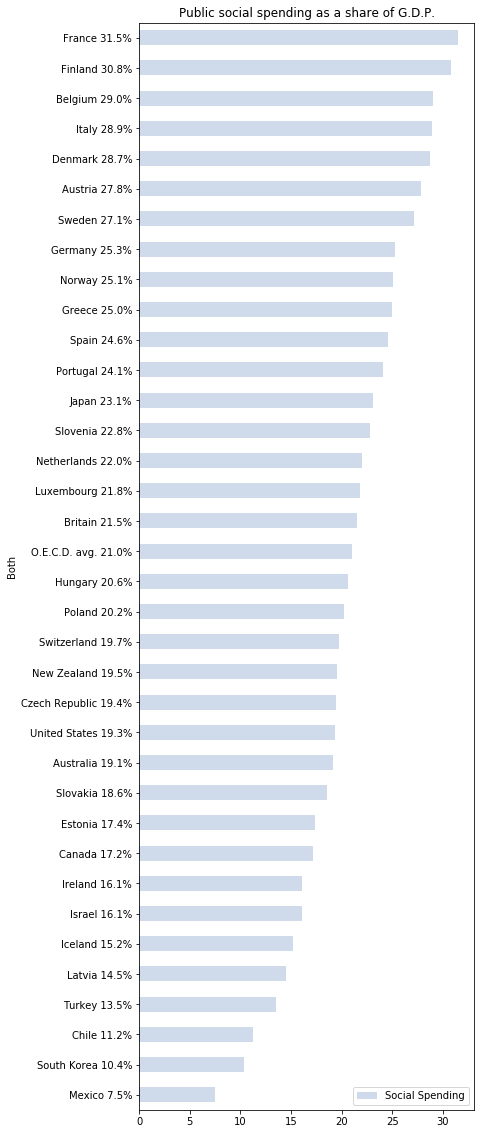

In [48]:
social.sort_values(by='Social Spending').plot(x='Both', 
                                              y='Social Spending', 
                                              kind='barh', 
                                              figsize=(6, 20),
                                              title="Public social spending as a share of G.D.P.",
                                             color="#cfdbeb")

## Retirement Chart

In [58]:
cook['win'] = 100 - cook.pct_defeated

In [59]:
cook

,cook_pvi,pct_defeated,win
0,C+7 or greater,76,24
1,C+3 to C+7,63,37
2,C+1 to C+3,61,39
3,I+1 to C+1,35,65
4,I+1 to I+3,25,75
5,I+3 to I+5,18,82
6,I+5 to I+10,7,93
7,I+10 or greater,0,100


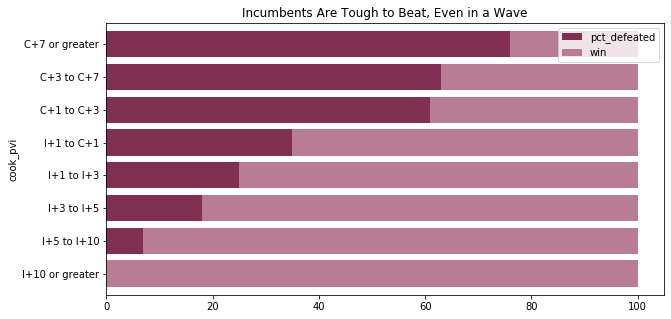

In [66]:
colors = ["#812f53", "#b87c93"]

cook.sort_values(by='pct_defeated').plot(x='cook_pvi', y=['pct_defeated','win'], kind='barh', stacked=True, figsize=(10, 5), width=0.8,
       title="Incumbents Are Tough to Beat, Even in a Wave", color=colors)

## Democrats Chart

In [70]:
generic.head()

,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


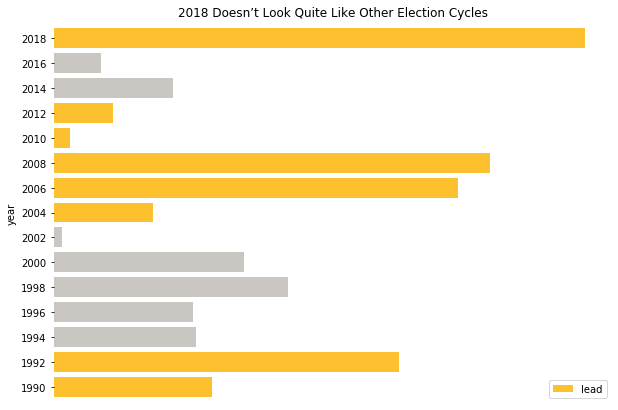

In [88]:
colors = []
for power in generic.in_power:
    if power == "no":
        colors.append("#fdc130")
    elif power == "yes":
        colors.append("#cac7c3")
colors.reverse()

ax = generic.sort_values(by='year').plot(x='year', y='lead', kind='barh', figsize=(10, 7), width=0.8,
       title="2018 Doesn’t Look Quite Like Other Election Cycles", color=colors)

for axis in ax.spines:
    ax.spines[axis].set_visible(False)
#plt.axis('off')
#ax.set_xlabel('off')

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)


# Buzzfeed: Diversity in the Agriculture Department

You are going to recreate the two line-graph visualizations in [this piece](https://www.buzzfeed.com/jsvine/agriculture-department-political-appointee-diversity) by the super-famous [Jeremy Singer-Vine](https://twitter.com/jsvine). If he can do it, you can too!

![](images/buzzfeed.png)

**I've included the 100% beautiful, cleaned up data:** `gender-by-quarter.csv` and `diversity-by-quarter.csv`.

Since there isn't much cleaning to do, this work is mostly going to be about **how to move between pandas/matplotlib and finish things up in Illustrator.**


In [89]:
racial = pd.read_csv("data/diversity-by-quarter.csv")
gender = pd.read_csv("data/gender-by-quarter.csv")

In [114]:
import re
racial['quarter'] = racial['quarter'].str.replace('(-.*)', '', regex = True)

In [116]:
racial.head()

,quarter,toa_group,count_all,count_minority,pct_minority
0,2006,all-permanent,1608157,521323,32.417419
1,2006,midlevel-appointees,2246,268,11.932324
2,2007,all-permanent,1618159,532756,32.923588
3,2007,midlevel-appointees,2315,259,11.187905
4,2008,all-permanent,1673249,560098,33.473679


toa_group
all-permanent          AxesSubplot(0.125,0.125;0.775x0.755)
midlevel-appointees    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

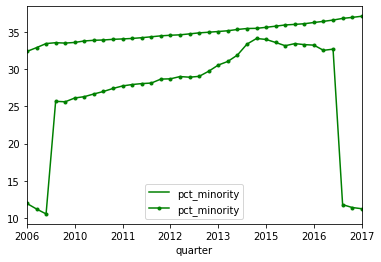

In [117]:
colors = ["green", "black"]
fig, ax = plt.subplots()

racial.groupby('toa_group').plot(ax=ax, x='quarter', y='pct_minority', marker='.', color=colors)

#racial.groupby('toa_group').plot(y='pct_minority', x='quarter')

# FiveThirtyEight: What makes Nigel Richards the best at Scrabble?

You are going to recreate the visualizations in [this piece](https://fivethirtyeight.com/features/what-makes-nigel-richards-the-best-scrabble-player-on-earth/) by [Oliver Roeder](https://twitter.com/ollie). This is one of my favorite series of charts in all of history! 

(When you break them down by divisions, though, don't draw the circles.)

![](images/sample-538.png)

**I've included the data, but there's a little work to be done:** 

* `scrabble-point-spread.csv` - the points for and against each player at Nationals from one year (2013)
* `scrabble-tournament.csv` - rating and division data for each player at Nationals from one year (2013)
* `ranked-players-with-scores.csv` - the top 200 ranked players and their average points per game (2018)

Note that the ranking data is from 2018 so the graph that uses it will look a bit different.


# The Economist

Recreate the donut chart from [this piece](https://www.economist.com/blogs/graphicdetail/2012/07/daily-chart-0) even though [they're terrible](https://peltiertech.com/chart-busters-the-economist-doesnt-read-forbes/).

![](images/economist.png)

In fact, the pies are _so terrible_ we're going to **recreate the [revised chart](https://peltiertech.com/chart-busters-the-economist-doesnt-read-forbes/), too**. The important thing about it is that while the original chart focuses on the actual values in 2007 and 2011, the arrow chart reduces those values to **just the change**, which is (arguably) the important part.

![](images/econ-revised.png)

The revised chart is ugly, though, so we're going to make it look nicer.

1. Slightly change the chart type (See Homework Hints file)
2. Change the colors (Make it match the Economist)
3. Change any other styles/font/etc (Make it match the Economist
4. Order the bars (Order by what? Up to you.)

**Data:** 
   
* `bank-profits.csv`

# The Guardian

We'll be recreating a single graph each from 

1. [this piece](https://www.theguardian.com/news/datablog/2018/jan/26/no-equality-in-the-honours-two-thirds-of-australia-day-awards-go-to-men)
2. and [this piece](https://www.theguardian.com/inequality/datablog/2017/jul/17/which-countries-most-and-least-committed-to-reducing-inequality-oxfam-dfi)
3. and [this piece](https://www.theguardian.com/money/datablog/2017/jan/06/tracking-the-cost-uk-and-european-commuter-rail-fares-compared-in-data)

![](images/guardian.png)

We'll be using skills from the Economist revision, so **please do that one first!**

**Data:**

* `order-of-australia.csv`
* `oxfam.csv`
* `commute.csv`